In [1]:
# import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import src.Teleconnection.index_statistic as sis
import src.Teleconnection.temporal_index as sti
import src.Teleconnection.spatial_pattern as ssp
import src.Teleconnection.pattern_statistic as sps
import src.composite.composite as scp
import src.plots.composite_plots as spcp

In [15]:
import cartopy.crs as ccrs
import src.plots.utils as spu

In [2]:
import src.plots.composite_plots as scpt

In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


# load index

In [3]:

## dependent
all_all_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/allPattern/dep_index_nonstd.nc"
).pc
changing_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_index_nonstd.nc"
).pc
all_all_dep = all_all_dep.transpose("time", "ens", "mode", "hlayers")


In [4]:
mean_dep = all_all_dep.mean(dim="time")
std_dep = all_all_dep.std(dim="time")
dep_std = (changing_dep - mean_dep) / std_dep

In [8]:
# load data
## index
## independent
all_all_ind = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/allPattern/ind_index_nonstd.nc"
).pc
changing_ind = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/changingPattern/ind_index_nonstd.nc"
).pc
all_all_ind = all_all_ind.transpose("time", "ens", "mode", "hlayers")

## dependent
all_all_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/allPattern/dep_index_nonstd.nc"
).pc
changing_dep = xr.open_dataset(
    "/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_index_nonstd.nc"
).pc
all_all_dep = all_all_dep.transpose("time", "ens", "mode", "hlayers")

# standardization
mean_ind = all_all_ind.mean(dim="time")
std_ind = all_all_ind.std(dim="time")
ind_std = (all_all_ind - mean_ind) / std_ind

mean_dep = all_all_dep.mean(dim="time")
std_dep = all_all_dep.std(dim="time")
dep_std = (changing_dep - mean_dep) / std_dep

# 850 hpa

Text(0.5, 1.0, 'PDF of EA index at 850hpa')

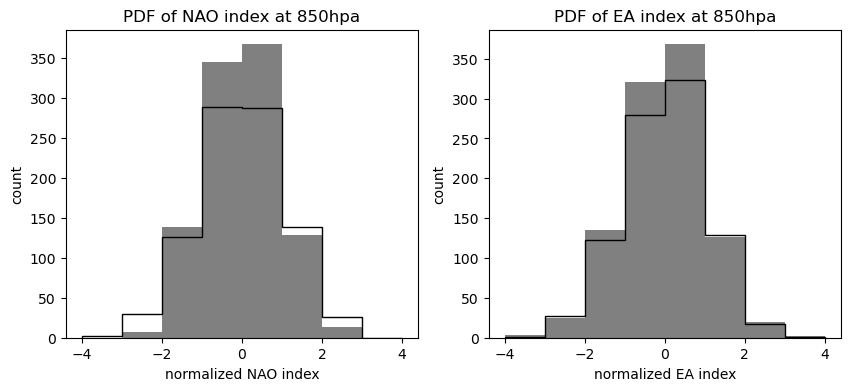

In [39]:
fig = plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
dep_std.sel(hlayers = 50000,
            mode = 'NAO',
            time = slice('1856','1865')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'stepfilled',
                        color = 'grey'
                )

dep_std.sel(hlayers = 50000,
            mode = 'NAO',
            time = slice('1986','1995')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'step',
                        color = 'k'
            )
plt.xlabel("normalized NAO index")
plt.ylabel("count")
plt.title("PDF of NAO index at 850hpa")

plt.subplot(1,2,2)
dep_std.sel(hlayers = 85000,
            mode = 'EA',
            time = slice('1856','1865')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'stepfilled',
                        color = 'grey'
                )

dep_std.sel(hlayers = 85000,
            mode = 'EA',
            time = slice('1986','1995')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'step',
                        color = 'k'
            )
plt.xlabel("normalized EA index")
plt.ylabel("count")
plt.title("PDF of EA index at 850hpa")




# 500 hap

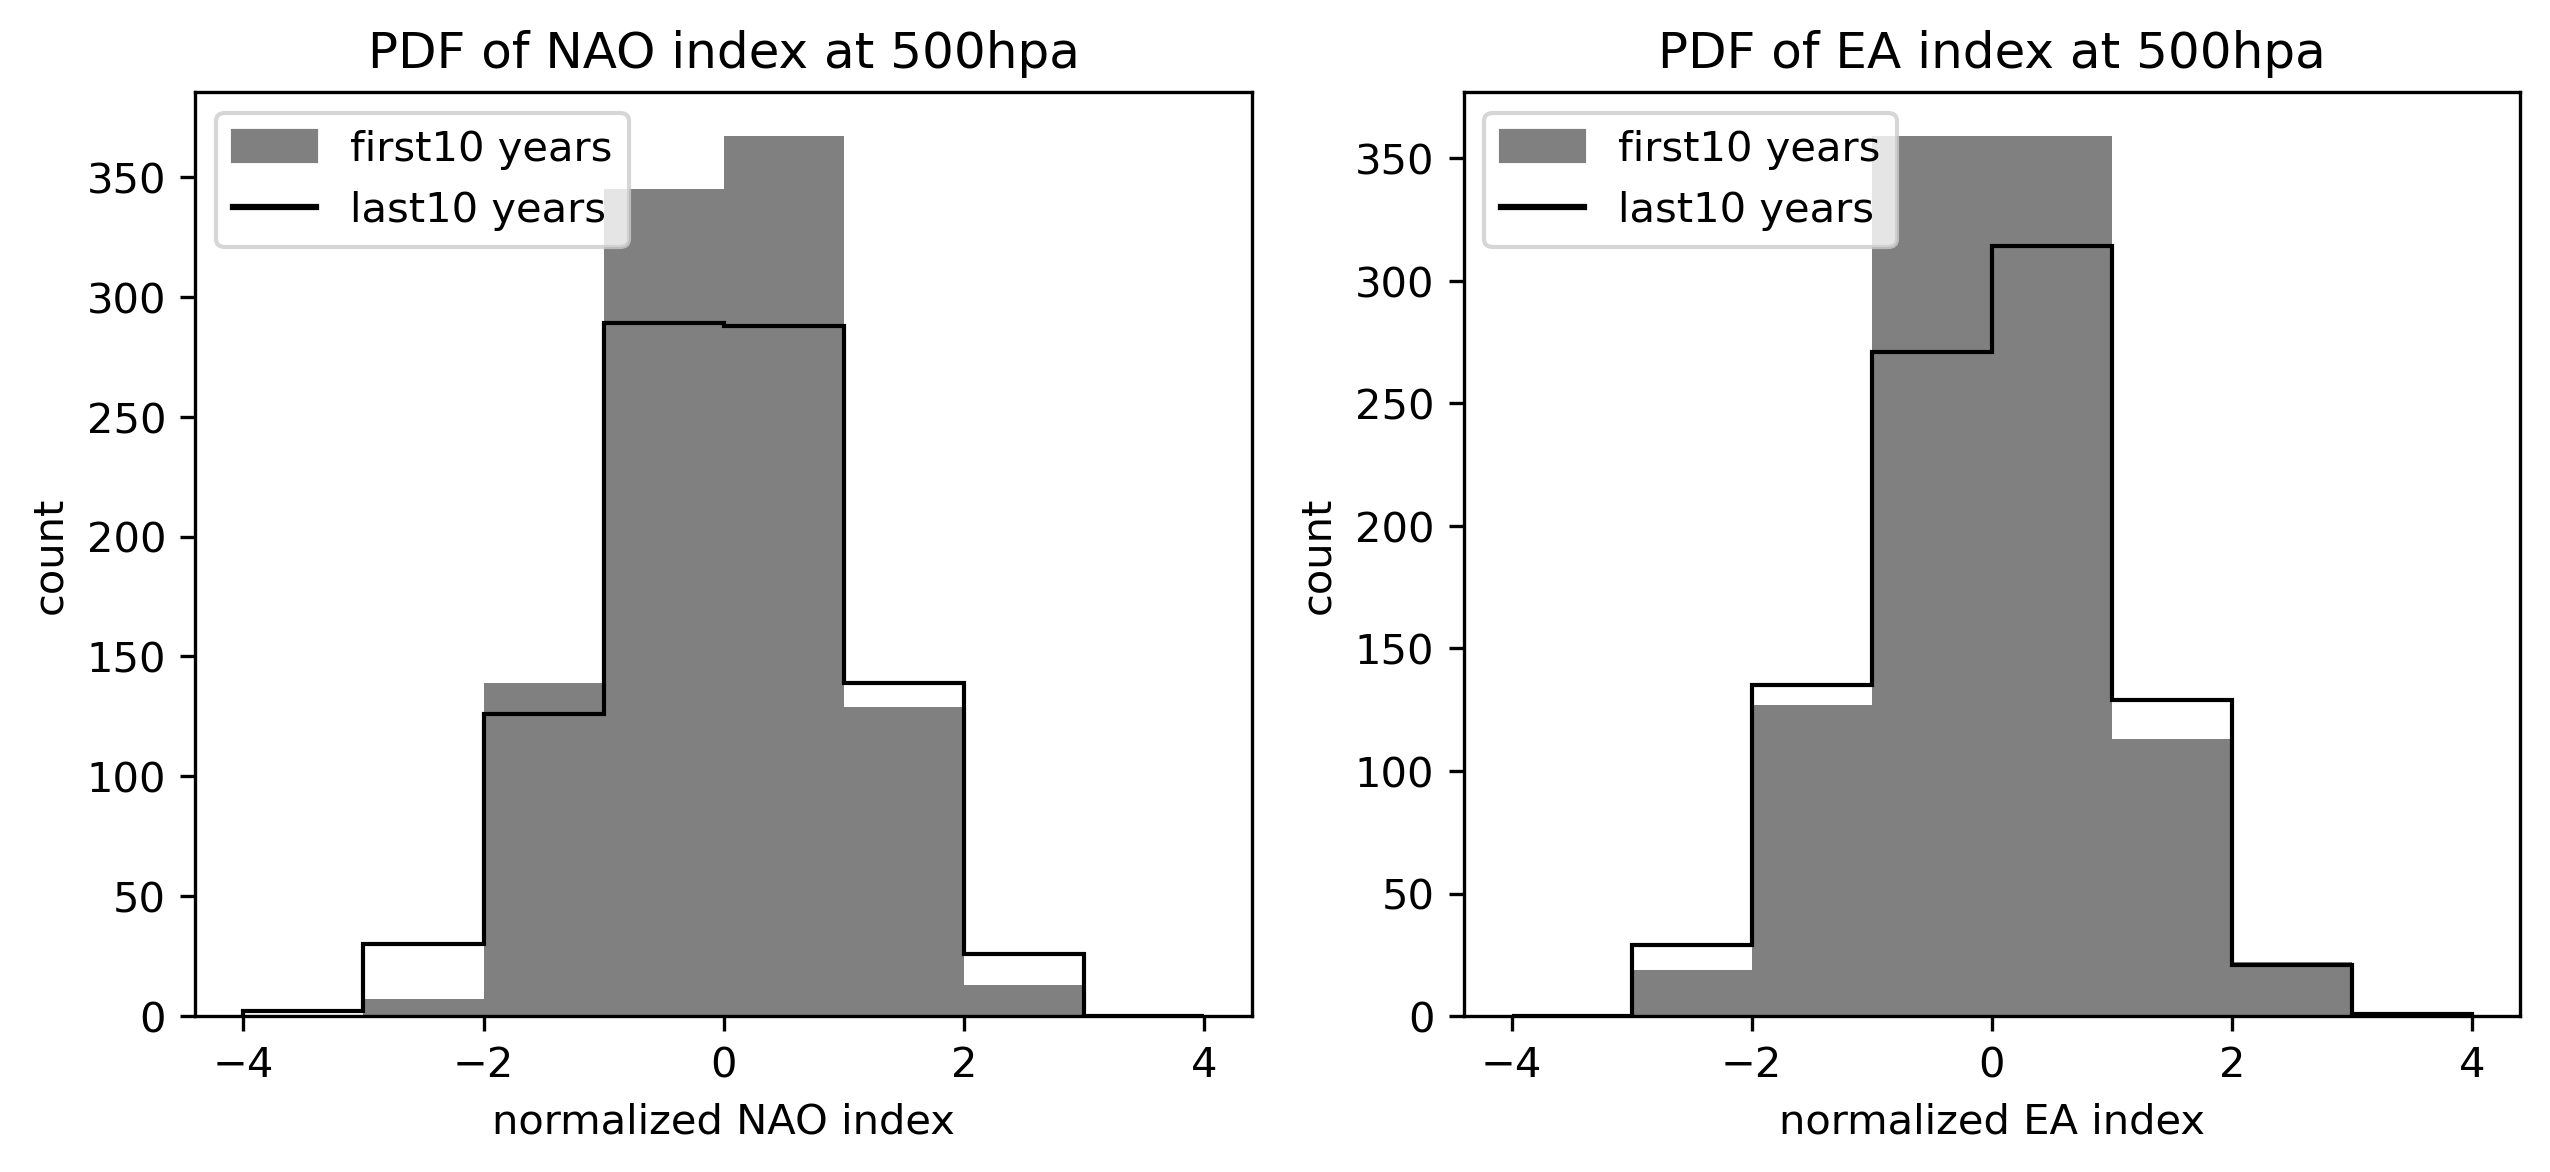

In [41]:
fig = plt.figure(figsize = (10,4),dpi = 300)
plt.subplot(1,2,1)
dep_std.sel(hlayers = 50000,
            mode = 'NAO',
            time = slice('1856','1865')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'stepfilled',
                        color = 'grey'
                )

dep_std.sel(hlayers = 50000,
            mode = 'NAO',
            time = slice('1986','1995')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'step',
                        color = 'k'
            )
plt.xlabel("normalized NAO index")
plt.ylabel("count")
plt.title("PDF of NAO index at 500hpa")
handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color='grey', label='first10 years')   
line = Line2D([0], [0], label='last10 years', color='k')

handles.extend([patch,line])

plt.legend(handles=handles,loc = 'upper left')


plt.subplot(1,2,2)
dep_std.sel(hlayers = 50000,
            mode = 'EA',
            time = slice('1856','1865')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'stepfilled',
                        color = 'grey'
                )

dep_std.sel(hlayers = 50000,
            mode = 'EA',
            time = slice('1986','1995')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'step',
                        color = 'k'
            )
plt.xlabel("normalized EA index")
plt.ylabel("count")
plt.title("PDF of EA index at 500hpa")


handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color='grey', label='first10 years')   
line = Line2D([0], [0], label='last10 years', color='k')

handles.extend([patch,line])

plt.legend(handles=handles,loc = 'upper left')
plt.show()


# 1000 hpa

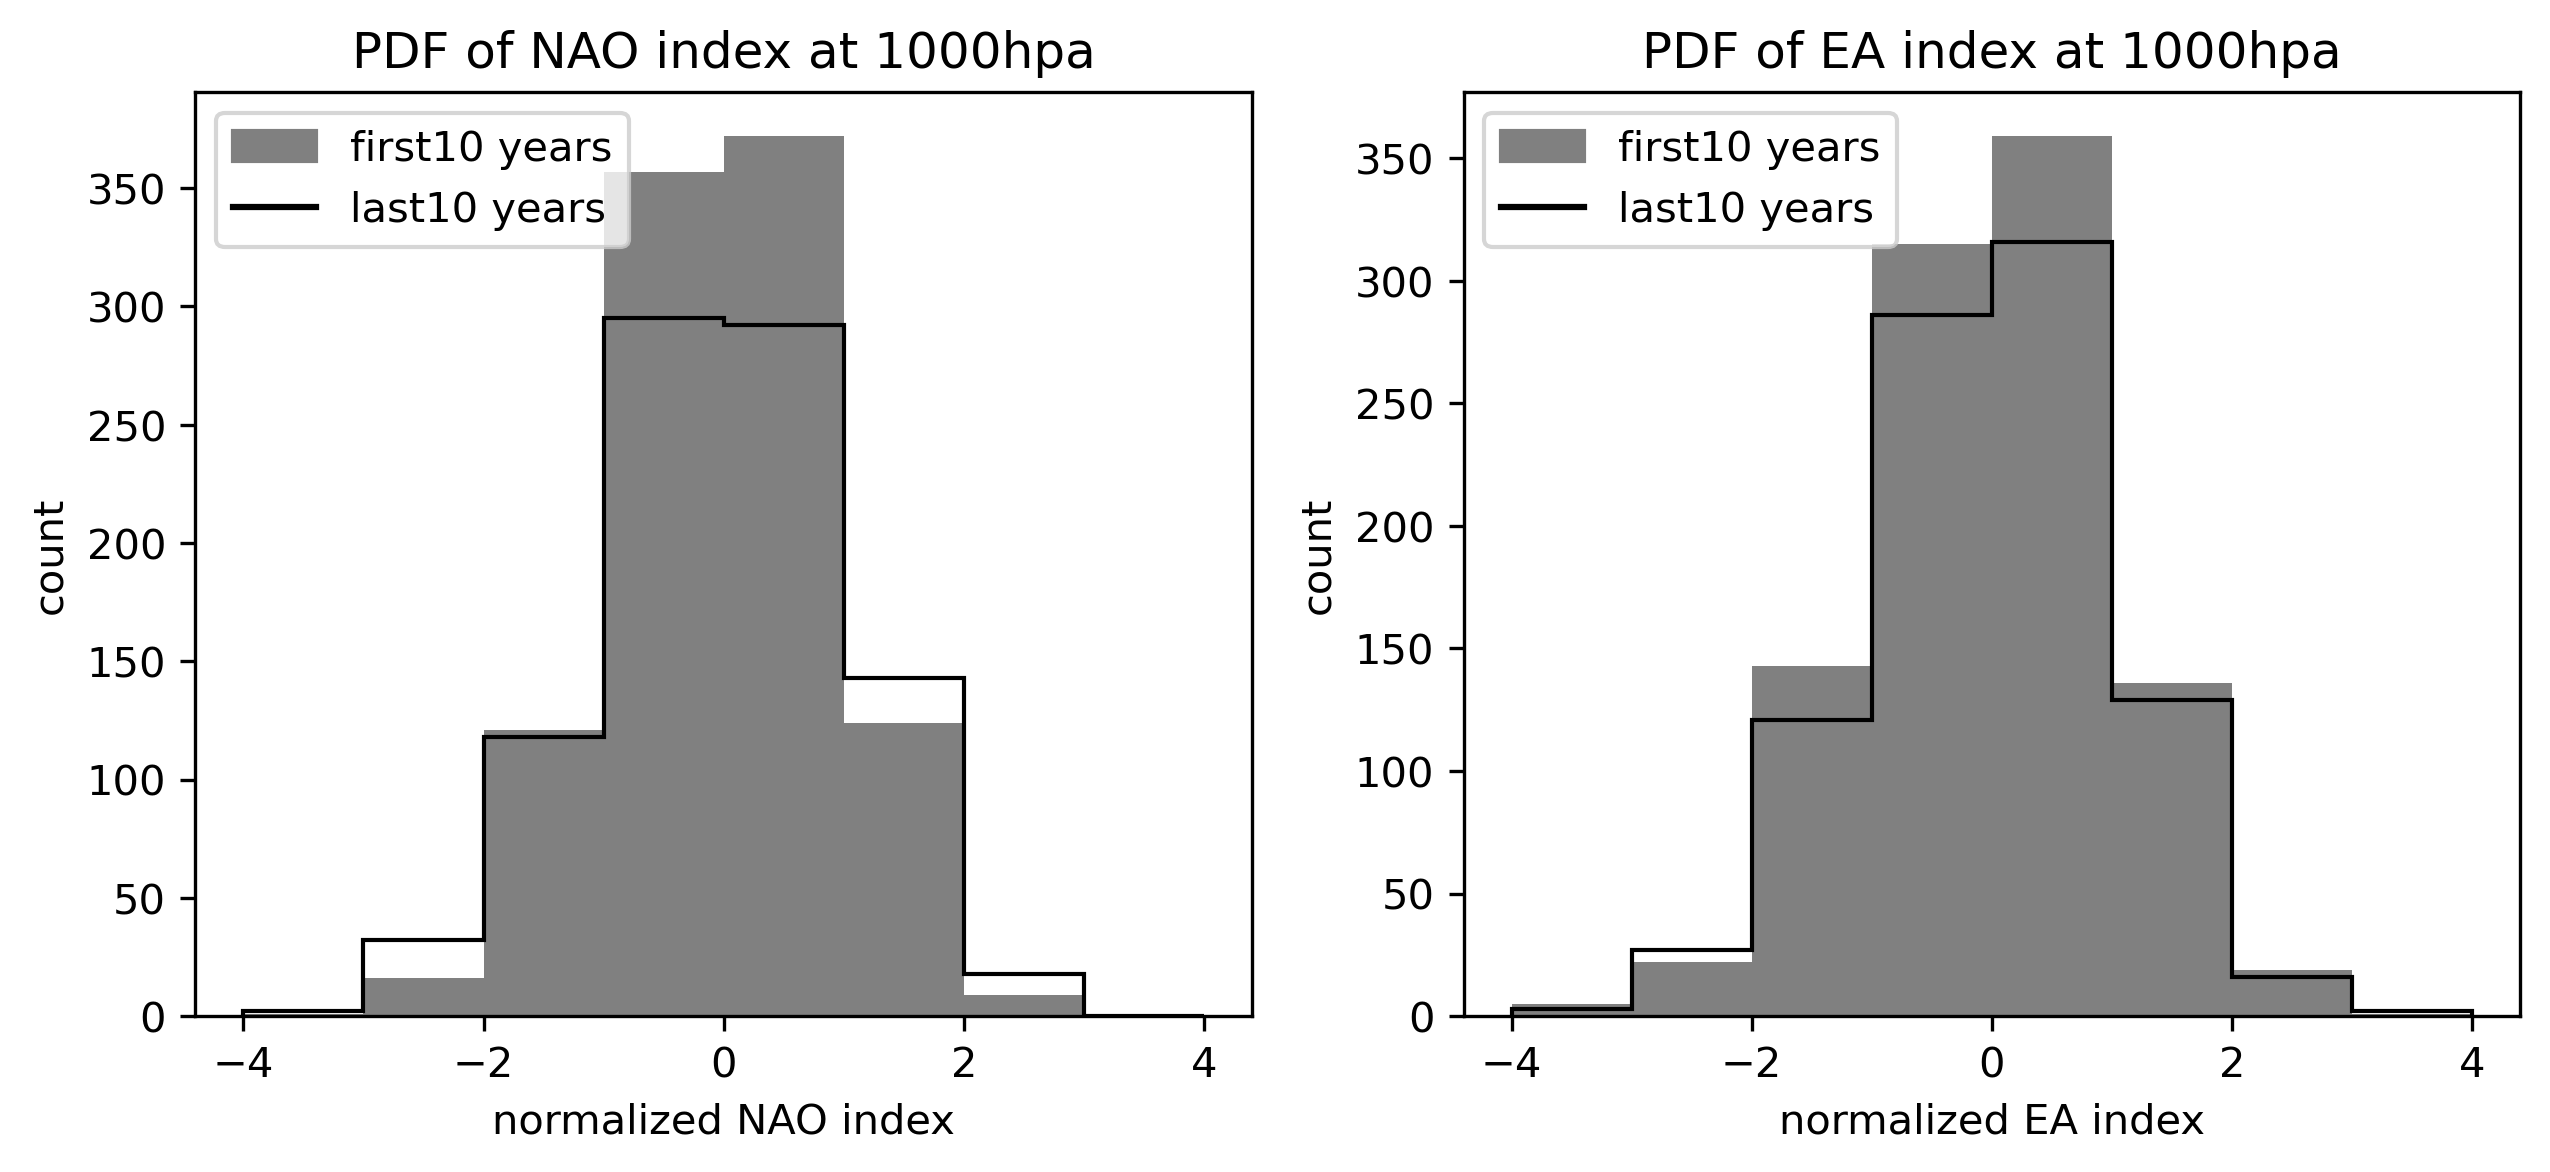

In [9]:
fig = plt.figure(figsize = (10,4),dpi = 300)
plt.subplot(1,2,1)
dep_std.sel(hlayers = 100000,
            mode = 'NAO',
            time = slice('1856','1865')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'stepfilled',
                        color = 'grey'
                )

dep_std.sel(hlayers = 100000,
            mode = 'NAO',
            time = slice('1986','1995')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'step',
                        color = 'k'
            )
plt.xlabel("normalized NAO index")
plt.ylabel("count")
plt.title("PDF of NAO index at 1000hpa")
handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color='grey', label='first10 years')   
line = Line2D([0], [0], label='last10 years', color='k')

handles.extend([patch,line])

plt.legend(handles=handles,loc = 'upper left')

plt.subplot(1,2,2)
dep_std.sel(hlayers = 100000,
            mode = 'EA',
            time = slice('1856','1865')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'stepfilled',
                        color = 'grey'
                )

dep_std.sel(hlayers = 100000,
            mode = 'EA',
            time = slice('1986','1995')
            ).plot.hist(bins = np.arange(-4,4.1,1),
                        histtype = 'step',
                        color = 'k'
            )
plt.xlabel("normalized EA index")
plt.ylabel("count")
plt.title("PDF of EA index at 1000hpa")

handles, labels = plt.gca().get_legend_handles_labels()

patch = mpatches.Patch(color='grey', label='first10 years')   
line = Line2D([0], [0], label='last10 years', color='k')

handles.extend([patch,line])

plt.legend(handles=handles,loc = 'upper left')
plt.show()




# spatial pattern together

In [10]:
dep_EOF = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/changingPattern/dep_EOF.nc")

In [11]:
mean_eof = dep_EOF.isel(time = [0,-1]).sel(hlayers = 50000).eof

<Figure size 3000x1200 with 0 Axes>

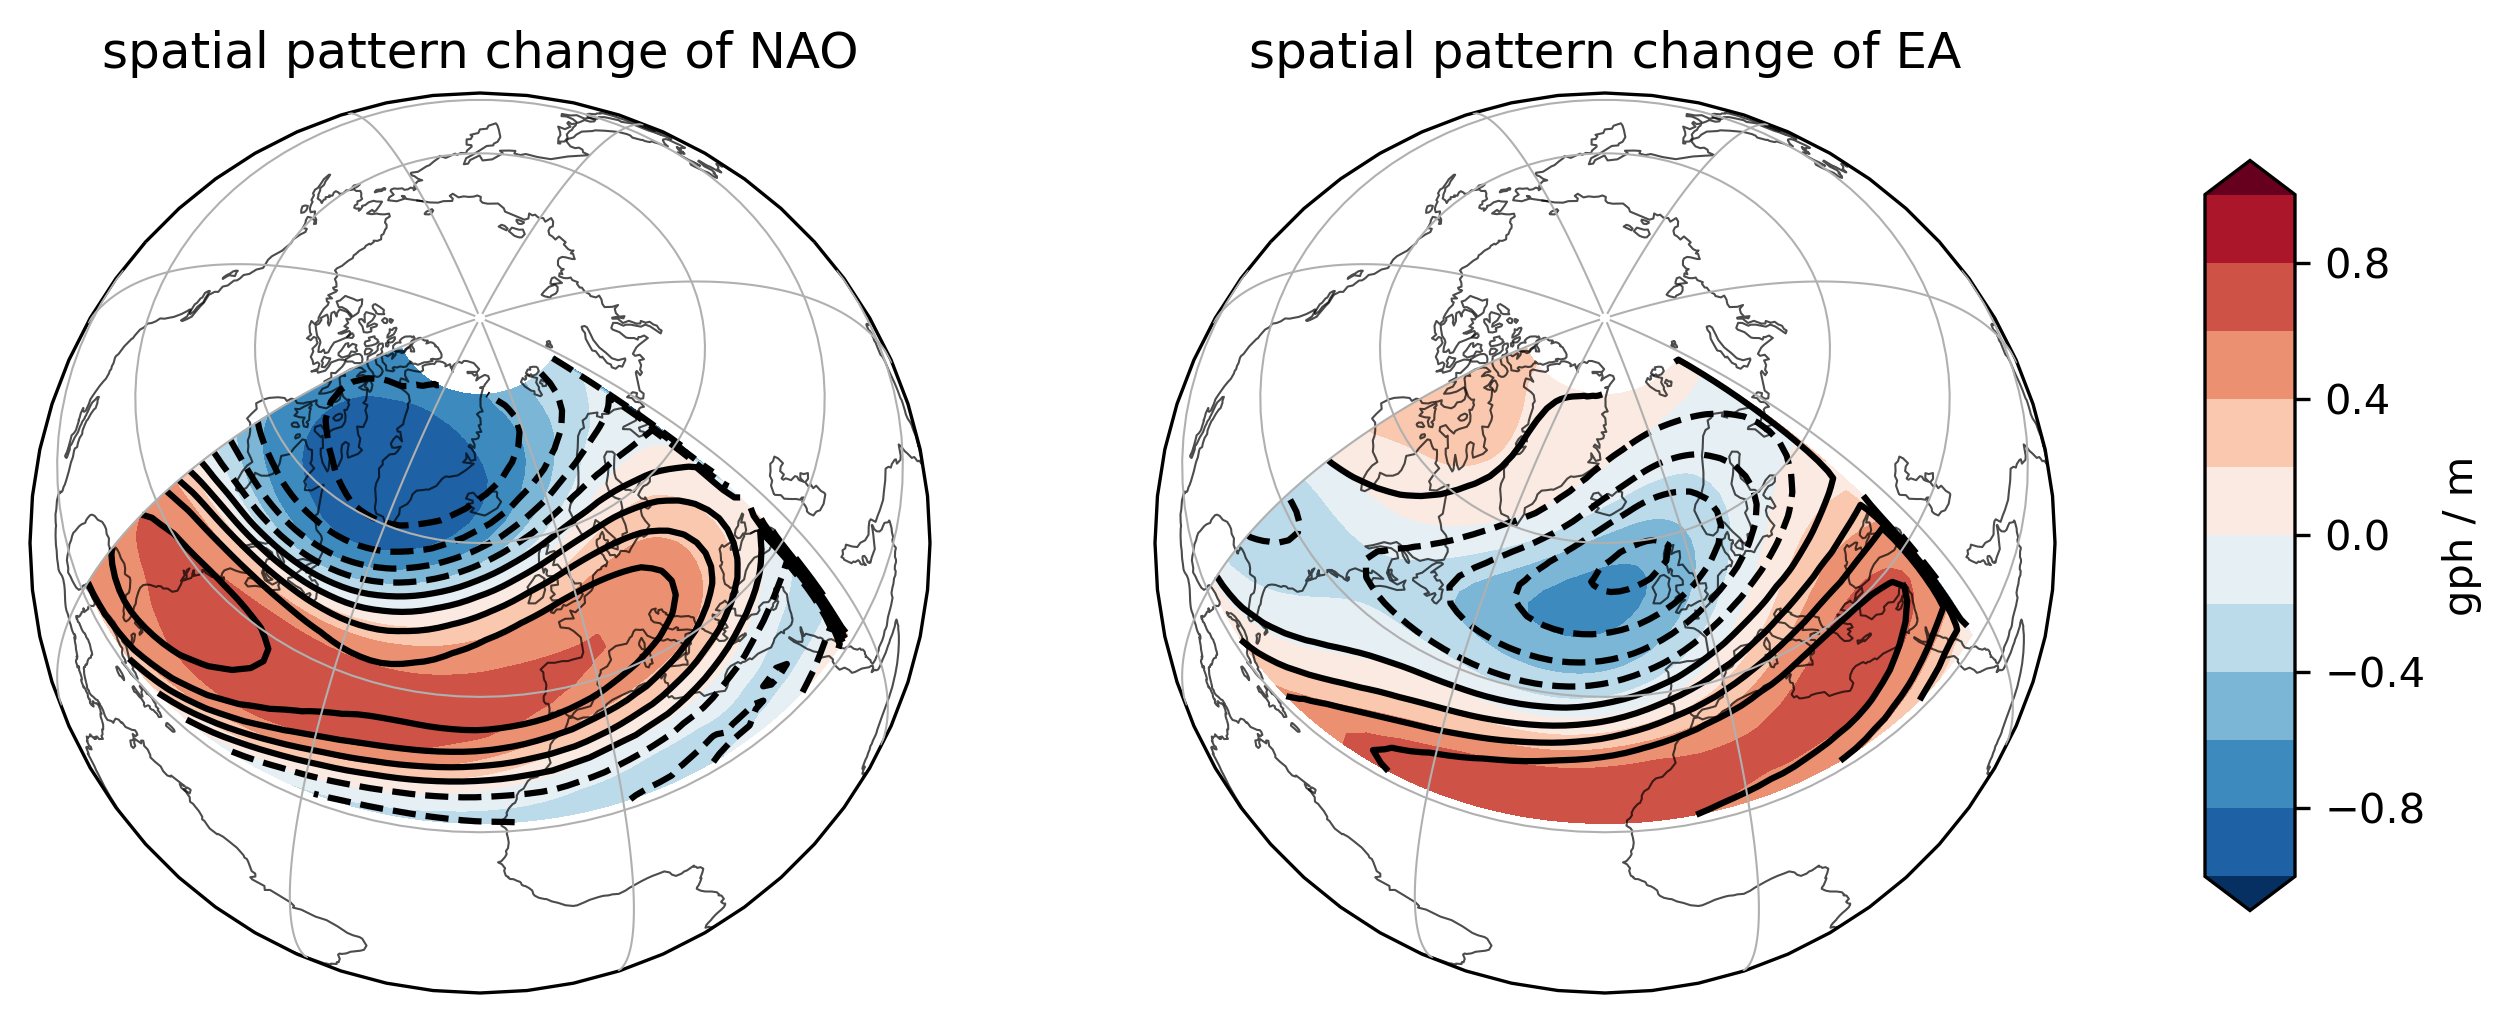

In [16]:
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
fig = plt.figure(figsize = (10,4),dpi = 300)
fig, axes = plt.subplots(
    1,  # shading for first10, contourf for last 10.
    2,  # NAO and EA.
    figsize=(10, 5),
    dpi=300,
    subplot_kw={"projection": proj},
)

modes = ['NAO','EA']

for i, ax in enumerate(axes):
    first = mean_eof.isel(time = 0).sel(mode = modes[i])
    last = mean_eof.isel(time = -1).sel(mode = modes[i])

    first = spu.erase_white_line(first)
    last = spu.erase_white_line(last)

    im = first.plot.contourf(
        levels = np.arange(-1,1.1,0.2),
        extend = 'both',
        transform = ccrs.PlateCarree(),
        add_colorbar = False,
        ax = ax,
    )

    last.plot.contour(
        levels = np.arange(-1,1.1,0.2),
        extend = 'both',
        transform = ccrs.PlateCarree(),
        colors = 'k',
        add_colorbar = False,
        ax = ax
    )

    spu.buildax(ax)

    axes[0].set_title("spatial pattern change of NAO")
    axes[1].set_title("spatial pattern change of EA")
    
fig.subplots_adjust(hspace=0.3, wspace=0.25, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.03, 0.5])
cbar = fig.colorbar(
    im,
    cax=cbar_ax,
    label="gph / m",
)

In [56]:
def plot_hist(dep_std,mode,hlayer):
    im = dep_std.sel(hlayers = hlayer,
                mode = mode,
                time = slice('1856','1865')
                ).plot.hist(bins = np.arange(-4,4.1,1),
                            histtype = 'stepfilled',
                            color = 'grey'
                    )

    dep_std.sel(hlayers = hlayer,
                mode = mode,
                time = slice('1986','1995')
                ).plot.hist(bins = np.arange(-4,4.1,1),
                            histtype = 'step',
                            color = 'k'
                )
    plt.xlabel(f"normalized {mode} index")
    plt.ylabel("count")
    plt.title(f"PDF of {mode} index at " + "%.0f" %(hlayer/100) + "hpa")
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return im


In [60]:
def plot_spatial(mean_eof,mode,hlayer):
    first = mean_eof.isel(time = 0).sel(mode = mode,hlayers = hlayer)
    last = mean_eof.isel(time = -1).sel(mode = mode,hlayers = hlayer)

    first = spu.erase_white_line(first)
    last = spu.erase_white_line(last)

    ax = plt.gca()

    im = first.plot.contourf(
        levels = np.arange(-1,1.1,0.2),
        extend = 'both',
        transform = ccrs.PlateCarree(),
        add_colorbar = False,
        ax = ax,
    )

    last.plot.contour(
        levels = np.arange(-1,1.1,0.2),
        extend = 'both',
        transform = ccrs.PlateCarree(),
        colors = 'k',
        add_colorbar = False,
        ax = ax
    )
    spu.buildax(ax)

    plt.title(f"spatial pattern change of {mode}")
    return im
  

In [58]:
def add_legend_hist():
    handles, labels = plt.gca().get_legend_handles_labels()

    patch = mpatches.Patch(color='grey', label='first10 years')   
    line = Line2D([0], [0], label='last10 years', color='k')

    handles.extend([patch,line])

    plt.legend(handles=handles,bbox_to_anchor=(1.5, 0.5))

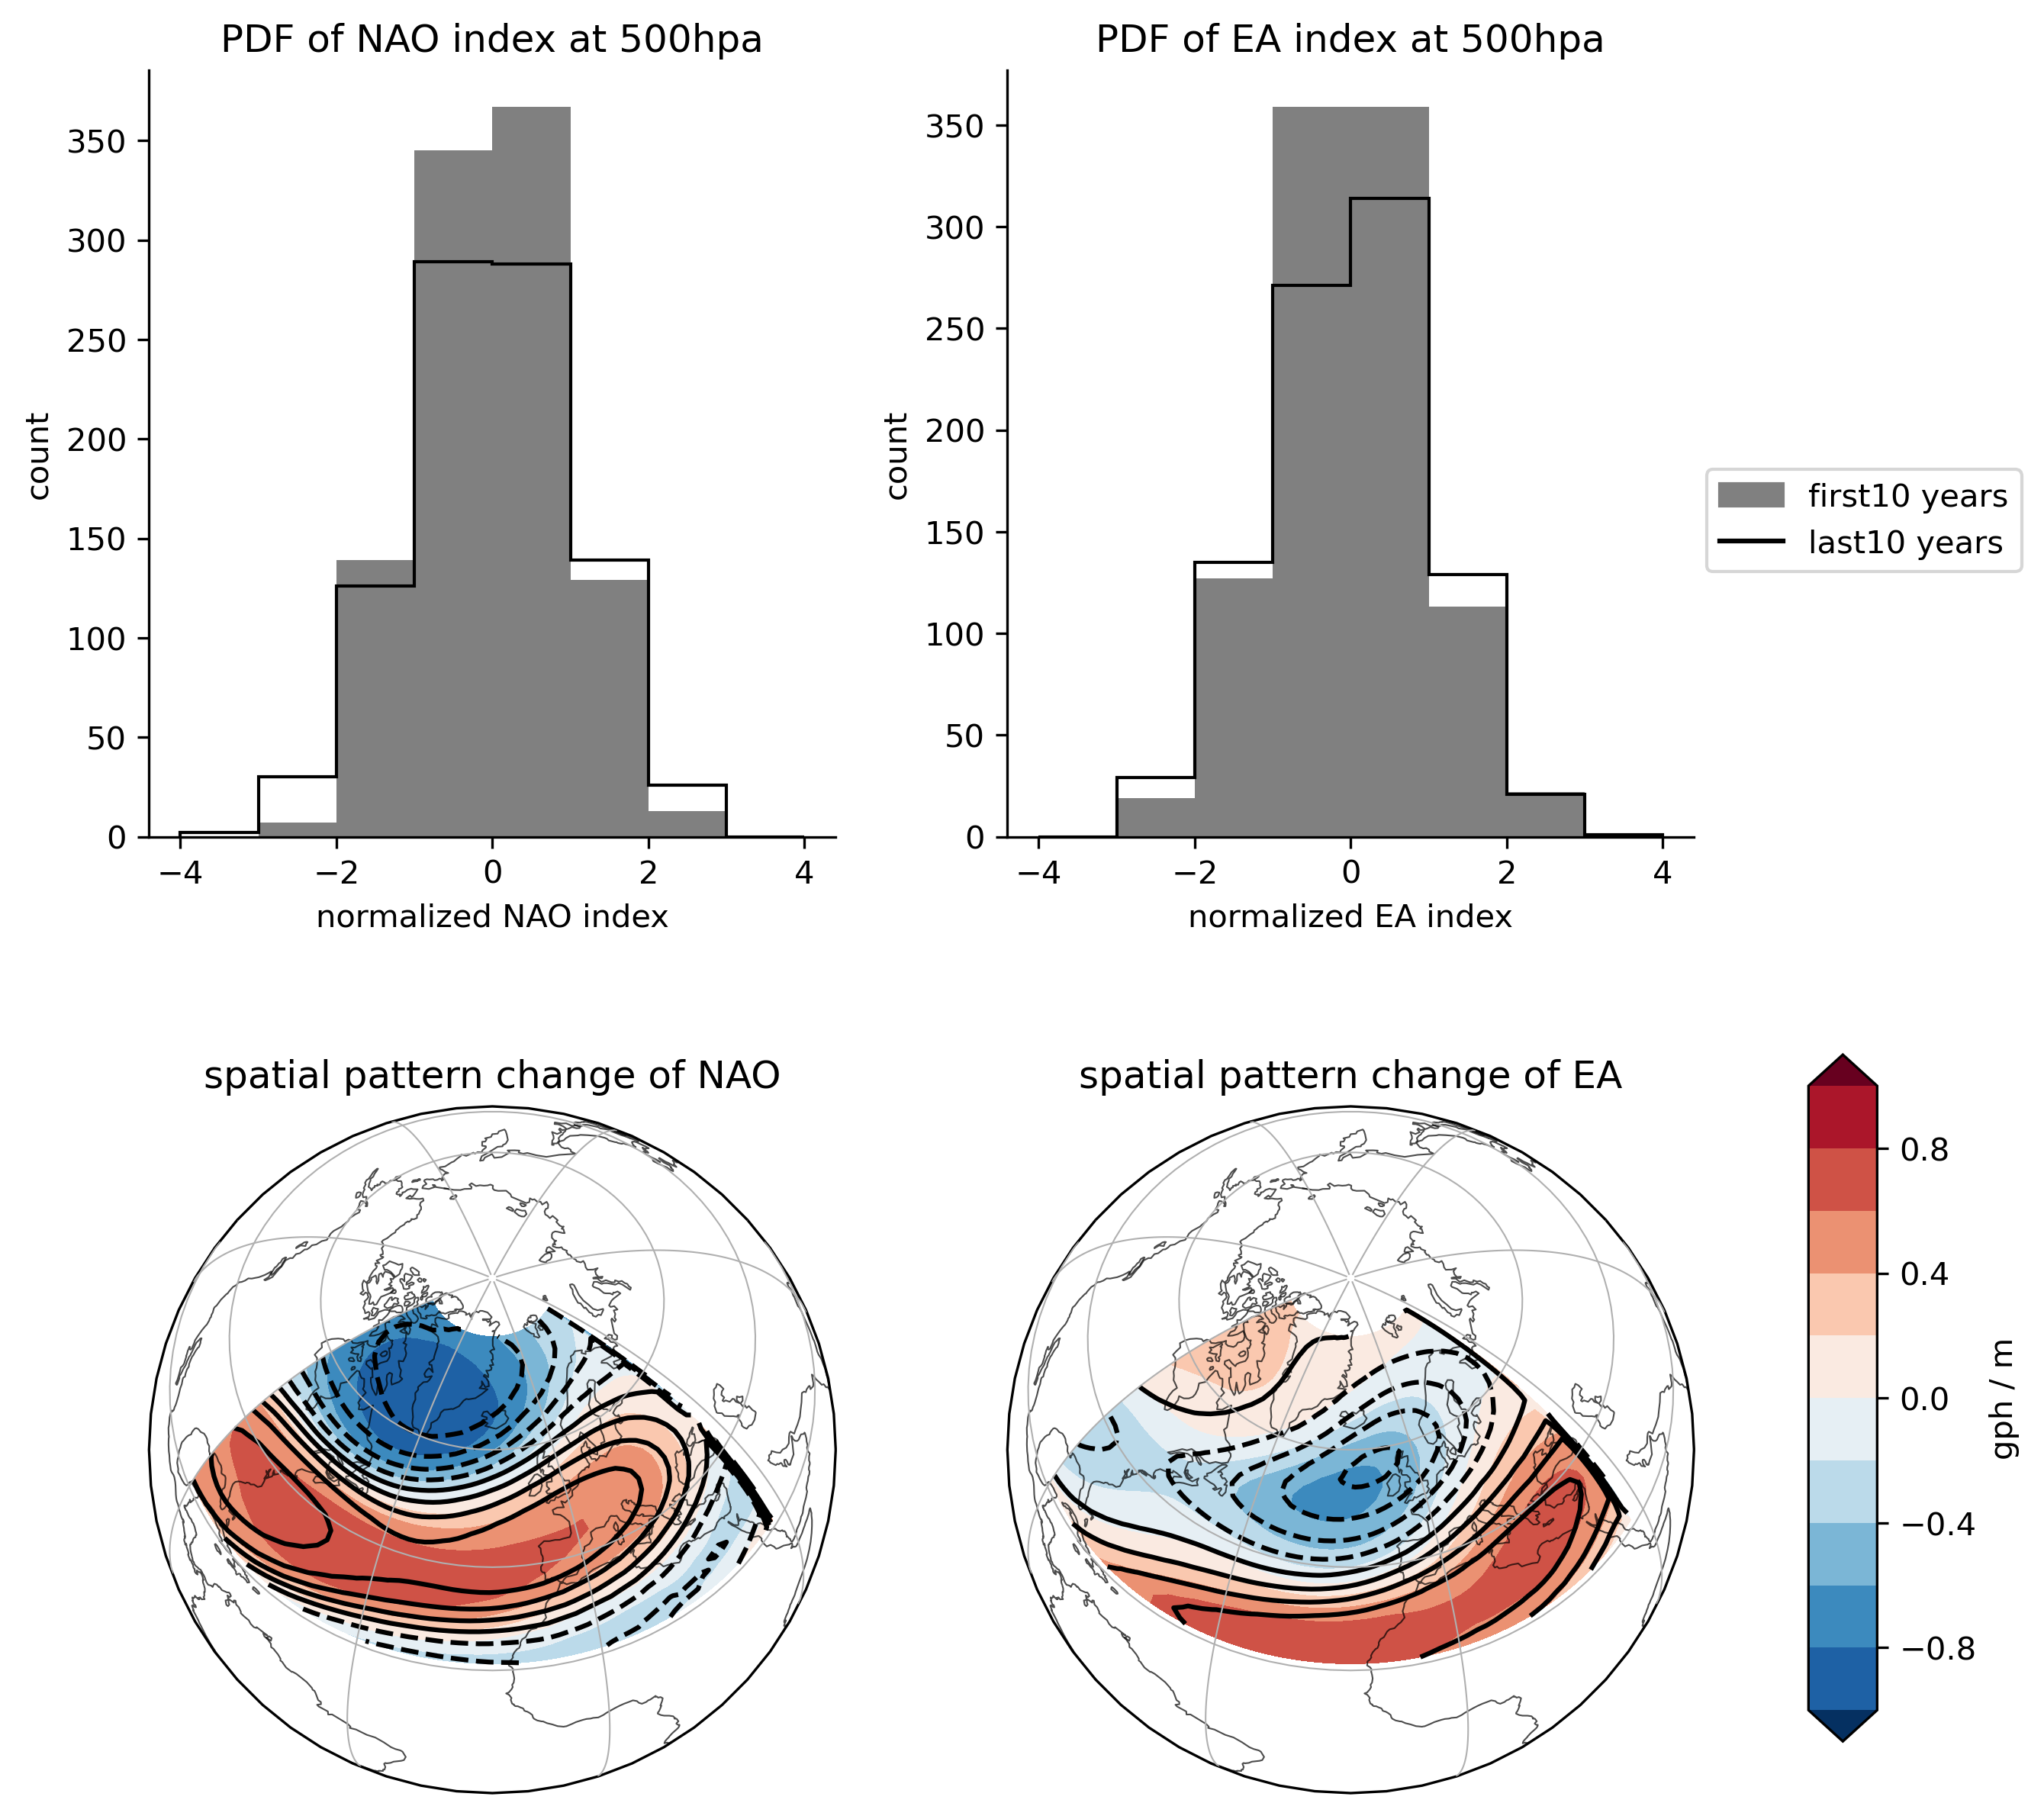

In [61]:
fig = plt.figure(figsize = (10,10),dpi = 300)
plt.subplot(2,2,1)
NAO_hist = plot_hist(dep_std,'NAO',50000)
# add_legend_hist()

plt.subplot(222)
EA_hist = plot_hist(dep_std, 'EA',50000)
add_legend_hist()

plt.subplot(223,projection = proj)
NAO_spa = plot_spatial(dep_EOF.eof,'NAO',50000)

plt.subplot(224,projection = proj)
EA_spa = plot_spatial(dep_EOF.eof, 'EA',50000)

fig.subplots_adjust(hspace=0.3, wspace=0.25, right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.3])
cbar = fig.colorbar(
    im,
    cax=cbar_ax,
    label="gph / m",
)

